
##                                   Exploratory Data Analysis
:
                                

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.

#Column	Details	Required output
'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
'Contract Valid Until'	Date as a string 	Convert to datetime type
'Height'	In inches with a quotation mark 	Convert to Float with decimal points
'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
(You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

Data Preprocessing:
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:
4.	Check for missing values and do a mean imputation where necessary.

In [58]:
#1.Import the necessary libraries and read the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('fifa.csv')
df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [11]:
df1=pd.read_csv('fifa_ variable_information.csv')
df1.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


2.	Drop any columns that you deem unecessary for analysis.

In [60]:
df=df[['ID','Name','Age','Value','Wage','Joined','Contract Valid Until','Height','Weight','Release Clause','Overall','Position','International Reputation']]
df.head()

,ID,Name,Age,Value,Wage,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall,Position,International Reputation
0,158023,L. Messi,31,€110.5M,€565K,"Jul 1, 2004",2021,5'7,159lbs,€226.5M,94,RF,5.0
1,20801,Cristiano Ronaldo,33,€77M,€405K,"Jul 10, 2018",2022,6'2,183lbs,€127.1M,94,ST,5.0
2,190871,Neymar Jr,26,€118.5M,€290K,"Aug 3, 2017",2022,5'9,150lbs,€228.1M,92,LW,5.0
3,193080,De Gea,27,€72M,€260K,"Jul 1, 2011",2020,6'4,168lbs,€138.6M,91,GK,4.0
4,192985,K. De Bruyne,27,€102M,€355K,"Aug 30, 2015",2023,5'11,154lbs,€196.4M,91,RCM,4.0


3.	The following columns need to be converted for further analysis:
'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.

In [61]:
cols=['Value','Wage','Release Clause','Weight']
for col in cols:
    df[col]=df[col].map(lambda x: str(x).lstrip('€').rstrip('MKlbs')).astype(float)
df.head()

,ID,Name,Age,Value,Wage,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall,Position,International Reputation
0,158023,L. Messi,31,110.5,565.0,"Jul 1, 2004",2021,5'7,159.0,226.5,94,RF,5.0
1,20801,Cristiano Ronaldo,33,77.0,405.0,"Jul 10, 2018",2022,6'2,183.0,127.1,94,ST,5.0
2,190871,Neymar Jr,26,118.5,290.0,"Aug 3, 2017",2022,5'9,150.0,228.1,92,LW,5.0
3,193080,De Gea,27,72.0,260.0,"Jul 1, 2011",2020,6'4,168.0,138.6,91,GK,4.0
4,192985,K. De Bruyne,27,102.0,355.0,"Aug 30, 2015",2023,5'11,154.0,196.4,91,RCM,4.0


'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
'Contract Valid Until'	Date as a string 	Convert to datetime type

In [62]:
df['Joined'] = pd.DatetimeIndex(df['Joined']).year
df.head()

,ID,Name,Age,Value,Wage,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall,Position,International Reputation
0,158023,L. Messi,31,110.5,565.0,2004.0,2021,5'7,159.0,226.5,94,RF,5.0
1,20801,Cristiano Ronaldo,33,77.0,405.0,2018.0,2022,6'2,183.0,127.1,94,ST,5.0
2,190871,Neymar Jr,26,118.5,290.0,2017.0,2022,5'9,150.0,228.1,92,LW,5.0
3,193080,De Gea,27,72.0,260.0,2011.0,2020,6'4,168.0,138.6,91,GK,4.0
4,192985,K. De Bruyne,27,102.0,355.0,2015.0,2023,5'11,154.0,196.4,91,RCM,4.0


'Contract Valid Until'	Date as a string 	Convert to datetime type

In [63]:
import datetime
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])
df['year'] = pd.DatetimeIndex(df['Contract Valid Until']).year.astype(str)
df.head()

,ID,Name,Age,Value,Wage,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall,Position,International Reputation,year
0,158023,L. Messi,31,110.5,565.0,2004.0,2021-01-01,5'7,159.0,226.5,94,RF,5.0,2021.0
1,20801,Cristiano Ronaldo,33,77.0,405.0,2018.0,2022-01-01,6'2,183.0,127.1,94,ST,5.0,2022.0
2,190871,Neymar Jr,26,118.5,290.0,2017.0,2022-01-01,5'9,150.0,228.1,92,LW,5.0,2022.0
3,193080,De Gea,27,72.0,260.0,2011.0,2020-01-01,6'4,168.0,138.6,91,GK,4.0,2020.0
4,192985,K. De Bruyne,27,102.0,355.0,2015.0,2023-01-01,5'11,154.0,196.4,91,RCM,4.0,2023.0


'Height'In inches with a quotation mark 	Convert to Float with decimal points

In [74]:
df['Height'] = (df.Height.str.split("'").str[0].astype(float) * 12) + (
    df.Height.str.split("'").str[1].astype(float)
)
df.head()

,ID,Name,Age,Value,Wage,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall,Position,International Reputation,year
0,158023,L. Messi,31,110.5,565.0,2004.0,2021-01-01 00:00:00,67.0,159.0,226.5,94,RF,5.0,2021.0
1,20801,Cristiano Ronaldo,33,77.0,405.0,2018.0,2022-01-01 00:00:00,74.0,183.0,127.1,94,ST,5.0,2022.0
2,190871,Neymar Jr,26,118.5,290.0,2017.0,2022-01-01 00:00:00,69.0,150.0,228.1,92,LW,5.0,2022.0
3,193080,De Gea,27,72.0,260.0,2011.0,2020-01-01 00:00:00,76.0,168.0,138.6,91,GK,4.0,2020.0
4,192985,K. De Bruyne,27,102.0,355.0,2015.0,2023-01-01 00:00:00,71.0,154.0,196.4,91,RCM,4.0,2023.0


4.	Check for missing values and do a mean imputation where necessary.

In [64]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Value                          0
Wage                           0
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
Overall                        0
Position                      60
International Reputation      48
year                           0
dtype: int64

In [65]:
df['Joined'].mean()

2016.4598294703976

In [66]:
df['Joined'].fillna(2016,inplace=True)

In [67]:
df['Joined'].isnull().sum()

0

In [68]:
df['Contract Valid Until'].mean()

Timestamp('2020-03-08 03:08:17.868065792')

In [69]:
df['Contract Valid Until'].fillna(2020-3-8 ,inplace=True)

In [70]:
df['Contract Valid Until'].isnull().sum()

0

In [75]:
df['Height'].mean()

71.3612533729831

In [72]:
df['Height'].fillna(71,inplace=True)

In [73]:
df['Height'].isnull().sum()

0

In [76]:
df['Weight'].mean()

165.97912880665234

In [77]:
df['Weight'].fillna(165,inplace=True)

In [78]:
df['Weight'].isnull().sum()

0

In [79]:
df['Release Clause'].mean()

228.20127380880928

In [80]:
df['Release Clause'].fillna(228,inplace=True)

In [81]:
df['Release Clause'].isnull().sum()

0

In [82]:
df['International Reputation'].mean()

1.1132220937276283

In [83]:
df['International Reputation'].fillna(1,inplace=True)

In [84]:
df['International Reputation'].isnull().sum()

0

In [85]:
df['Position'].value_counts().head()

ST    2152
GK    2025
CB    1778
CM    1394
LB    1322
Name: Position, dtype: int64

In [86]:
df['Position'].fillna('ST',inplace=True)

In [87]:
df['Position'].isnull().sum()

0

Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 

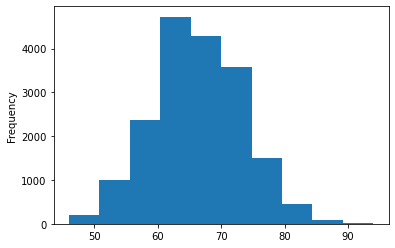

In [88]:
df['Overall'].plot(kind='hist')
plt.show()

In [89]:
df['Overall'].skew()

0.06718492227833812

2.Generate pair plots for the following variables:Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [90]:
df_num=df[['Value','Wage','International Reputation','Height','Weight','Release Clause']]
df_num.head()

,Value,Wage,International Reputation,Height,Weight,Release Clause
0,110.5,565.0,5.0,67.0,159.0,226.5
1,77.0,405.0,5.0,74.0,183.0,127.1
2,118.5,290.0,5.0,69.0,150.0,228.1
3,72.0,260.0,4.0,76.0,168.0,138.6
4,102.0,355.0,4.0,71.0,154.0,196.4


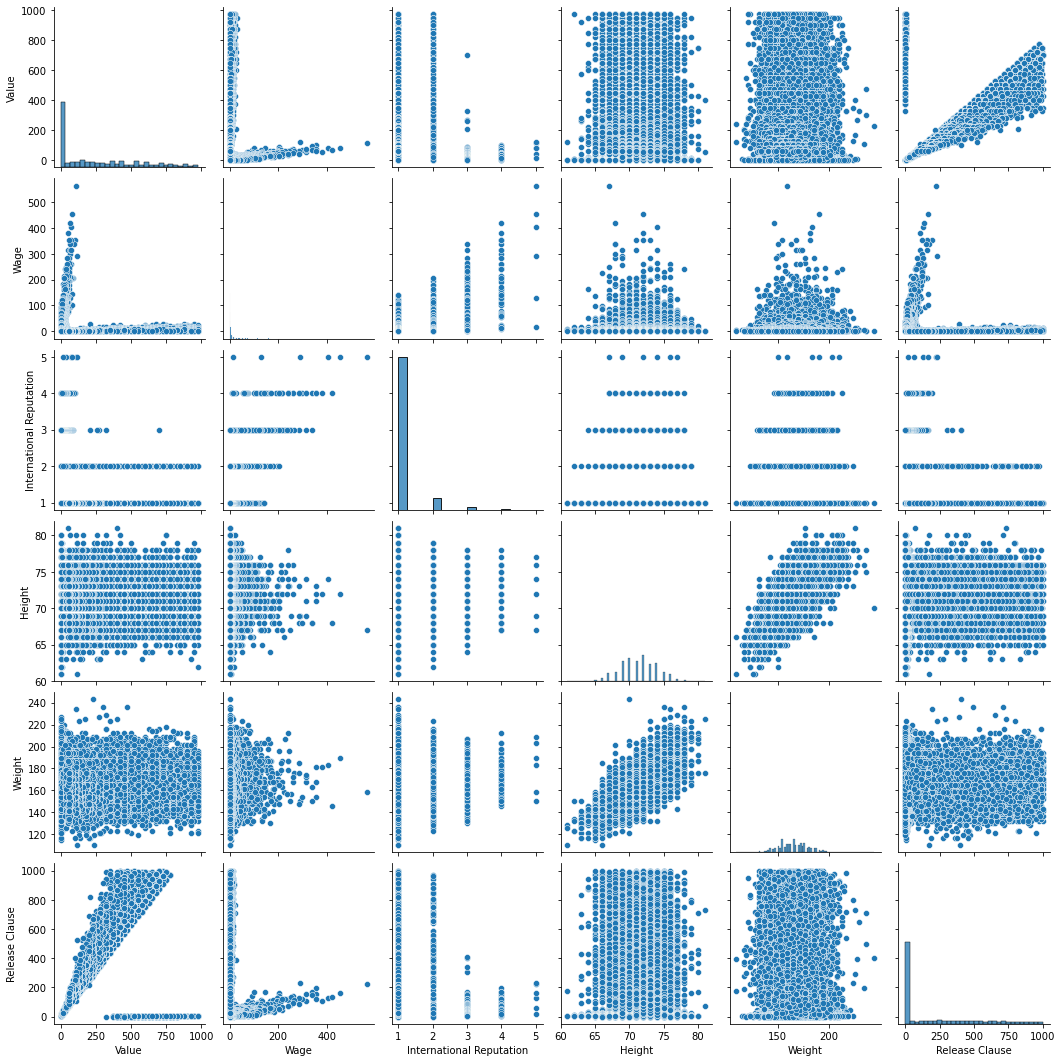

In [287]:
sns.pairplot(df_num)
plt.show()

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [91]:
df1=df[df['Joined']=='2020.0'].sort_values(by='Overall',ascending=False).head(20)
df1=df[['ID', 'Name','Overall','Value', 'Wage','Age','International Reputation','Position','Height', 'Weight','Release Clause']]

In [92]:
df1.head(20)

,ID,Name,Overall,Value,Wage,Age,International Reputation,Position,Height,Weight,Release Clause
0,158023,L. Messi,94,110.5,565.0,31,5.0,RF,67.0,159.0,226.5
1,20801,Cristiano Ronaldo,94,77.0,405.0,33,5.0,ST,74.0,183.0,127.1
2,190871,Neymar Jr,92,118.5,290.0,26,5.0,LW,69.0,150.0,228.1
3,193080,De Gea,91,72.0,260.0,27,4.0,GK,76.0,168.0,138.6
4,192985,K. De Bruyne,91,102.0,355.0,27,4.0,RCM,71.0,154.0,196.4
5,183277,E. Hazard,91,93.0,340.0,27,4.0,LF,68.0,163.0,172.1
6,177003,L. Modrić,91,67.0,420.0,32,4.0,RCM,68.0,146.0,137.4
7,176580,L. Suárez,91,80.0,455.0,31,5.0,RS,72.0,190.0,164.0
8,155862,Sergio Ramos,91,51.0,380.0,32,4.0,RCB,72.0,181.0,104.6
9,200389,J. Oblak,90,68.0,94.0,25,3.0,GK,74.0,192.0,144.5


a)What would the average wage for this set of players be?

In [45]:
print("The average wage of top 20 players by overall rating is=",df1['Wage'].mean())

The average wage of top 20 players by overall rating is= 9.731312132696216


b)What is the average age?

In [46]:
print("The average age of top 20 players by overall rating is=",df1['Age'].mean())

The average age of top 20 players by overall rating is= 25.122205745043114


c)	Is there a correlation between the Overall rating and Value for these players?

In [93]:
df_corr=df[['Overall','Value']]
df_corr.head(20)

,Overall,Value
0,94,110.5
1,94,77.0
2,92,118.5
3,91,72.0
4,91,102.0
5,91,93.0
6,91,67.0
7,91,80.0
8,91,51.0
9,90,68.0


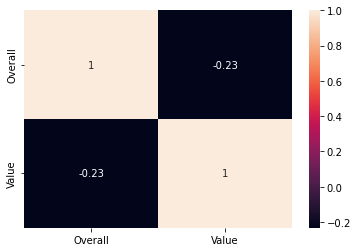

In [94]:
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

4.	Generate tables containing the top 5 players by Overall rating for each unique position.

a)Are there any players appearing in more than one Table. Please point out such players.

In [101]:
data4=df1[['Name','Position','Overall','Wage']]
data4.groupby(['Position','Name'])['Overall'].sum()

Position  Name        
CAM       A. Adouyev       62
          A. Ajagun        69
          A. Aktas         54
          A. Al Fraidi     67
          A. Al Nazera     62
                         ... 
ST        Zé Turbo         67
          Álex López       66
          Álvaro          140
          Ángel            79
          Éder             75
Name: Overall, Length: 18096, dtype: int64

b)	What is the average wage one can expect to pay for the top 5 in every position?

In [104]:
final_c=data4.groupby(['Position','Name'])['Wage'].mean()
final_c

Position  Name        
CAM       A. Adouyev       2.0
          A. Ajagun        7.0
          A. Aktas         1.0
          A. Al Fraidi    12.0
          A. Al Nazera     5.0
                          ... 
ST        Zé Turbo         5.0
          Álex López       3.0
          Álvaro          12.0
          Ángel           31.0
          Éder             1.0
Name: Wage, Length: 18096, dtype: float64